# Monkey Classification Pytorch

### Libraries

In [4]:
os.chdir('..')

In [5]:
import os

In [6]:
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
import torch.utils.data as data

from matplotlib.pyplot import imshow

import src.dataset.RandomImage as rI

### Data import and preprocessing training and test sets

In [7]:
BATCH_SIZE = 1000

In [8]:
preprocessing = transforms.Compose([
                transforms.RandomResizedCrop(50, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(0, 1)
            ])

In [11]:
train_data = datasets.ImageFolder('data/training/training', transform = preprocessing)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [13]:
test_data = datasets.ImageFolder('data/validation/validation', transform = preprocessing)
test_data_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

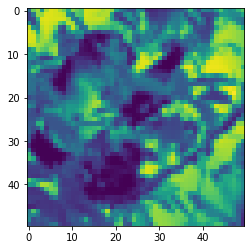

In [14]:
x, _ = train_data[10] 
imshow(x.numpy()[0])

y = 2-cacajao_calvus


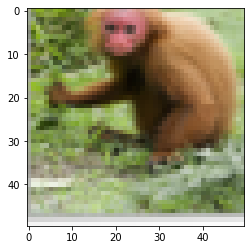

In [15]:
rI.get_random_monkey(train_data, random = True, cat_num = None, pic_num = None)

In [16]:
train_data

Dataset ImageFolder
    Number of datapoints: 1097
    Root location: data/training/training
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(50, 50), scale=(0.5, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=0, std=1)
           )

In [17]:
train_data_loader

In [18]:
train_data[10]

(tensor([[[0.3608, 0.5647, 0.2784,  ..., 0.7608, 0.7961, 0.5843],
          [0.4392, 0.7059, 0.3059,  ..., 0.8471, 0.8353, 0.7922],
          [0.6353, 0.8588, 0.4588,  ..., 0.8588, 0.8392, 0.8157],
          ...,
          [0.9216, 0.7373, 0.2902,  ..., 0.4627, 0.4902, 0.3098],
          [0.9137, 0.5725, 0.2706,  ..., 0.3137, 0.3137, 0.3098],
          [0.9098, 0.5020, 0.2275,  ..., 0.4392, 0.2392, 0.2745]],
 
         [[0.4196, 0.6039, 0.3647,  ..., 0.7686, 0.8000, 0.6039],
          [0.4980, 0.7333, 0.3843,  ..., 0.8471, 0.8314, 0.7922],
          [0.6745, 0.8745, 0.5098,  ..., 0.8549, 0.8314, 0.8078],
          ...,
          [0.9098, 0.7373, 0.3255,  ..., 0.4784, 0.5137, 0.3529],
          [0.9020, 0.5922, 0.3176,  ..., 0.3412, 0.3490, 0.3451],
          [0.8980, 0.5255, 0.2784,  ..., 0.4510, 0.2667, 0.3020]],
 
         [[0.2275, 0.4706, 0.0627,  ..., 0.7961, 0.8196, 0.4588],
          [0.2980, 0.6667, 0.1020,  ..., 0.8824, 0.8667, 0.8196],
          [0.5647, 0.8941, 0.3216,  ...,

Size of traning example

In [19]:
train_data[10][0].shape

torch.Size([3, 50, 50])

W traning datasetcie tuple, tensor obrazka + labelka

In [20]:
import torch.nn.functional as F
from torch import nn
from torch import optim
import torch

In [21]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3,3,3,1)
        self.conv2 = nn.Conv2d(3,3,3,1)
        self.fc1 = nn.Linear(1587, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [22]:
NeuralNet()

NeuralNet(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1587, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
model = NeuralNet()
optimizer = optim.Adam(model.parameters())
for e in range(10):
    model.train()
    for (i,l) in train_data_loader:
        optimizer.zero_grad()
        #data = i.view(i.size(0), -1)
        output = model(i)
        loss = F.nll_loss(output, l)
        loss.backward()
        optimizer.step()
        
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_data_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, 
                         reduction='sum').item() 
            pred = output.argmax(dim=1, keepdim=True)  
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_data_loader.dataset),
        100. * correct / len(test_data_loader.dataset)))


Test set: Average loss: 2.2742, Accuracy: 36/272 (13%)


Test set: Average loss: 2.2452, Accuracy: 46/272 (17%)


Test set: Average loss: 2.2141, Accuracy: 57/272 (21%)


Test set: Average loss: 2.1841, Accuracy: 73/272 (27%)


Test set: Average loss: 2.1673, Accuracy: 75/272 (28%)


Test set: Average loss: 2.1272, Accuracy: 73/272 (27%)


Test set: Average loss: 2.0850, Accuracy: 77/272 (28%)


Test set: Average loss: 2.0501, Accuracy: 82/272 (30%)


Test set: Average loss: 2.0299, Accuracy: 81/272 (30%)

